In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
y_train = pd.read_csv("Y_train.csv")
y_train= y_train["mort_icu"]
y_valid = pd.read_csv("Y_valid.csv")
y_valid = y_valid["mort_icu"]

X_train = pd.read_csv("X_train_new.csv")
X_train = X_train.dropna(axis = 1)
X_valid = pd.read_csv("X_valid_new.csv")
X_valid = X_valid.dropna(axis = 1)

/tmp/.u3568933/ipykernel_4004/93411654.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(X_valid)
/tmp/.u3568933/ipykernel_4004/93411654.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(y_valid)


In [ ]:
#Alternatively you can use this code to load the X:
X_train = pd.read_csv("X_train.csv", index_col=[0], header=[0, 1, 2])
X_train = aggregate_features(X_train, mask=True, time=False, less=False, ran=True, std=False).iloc[:-30, : ]
X_test = pd.read_csv("X_test.csv", index_col=[0], header=[0, 1, 2])
X_test = aggregate_features(X_test, mask=True, time=False, less=False, ran=True, std=False).iloc[:-30, : ]
X_valid = pd.read_csv("X_valid.csv", index_col=[0], header=[0, 1, 2])
X_valid = aggregate_features(X_valid, mask=True, time=False, less=False, ran=True, std=False).iloc[:-30, : ]

<function matplotlib.pyplot.show(close=None, block=None)>

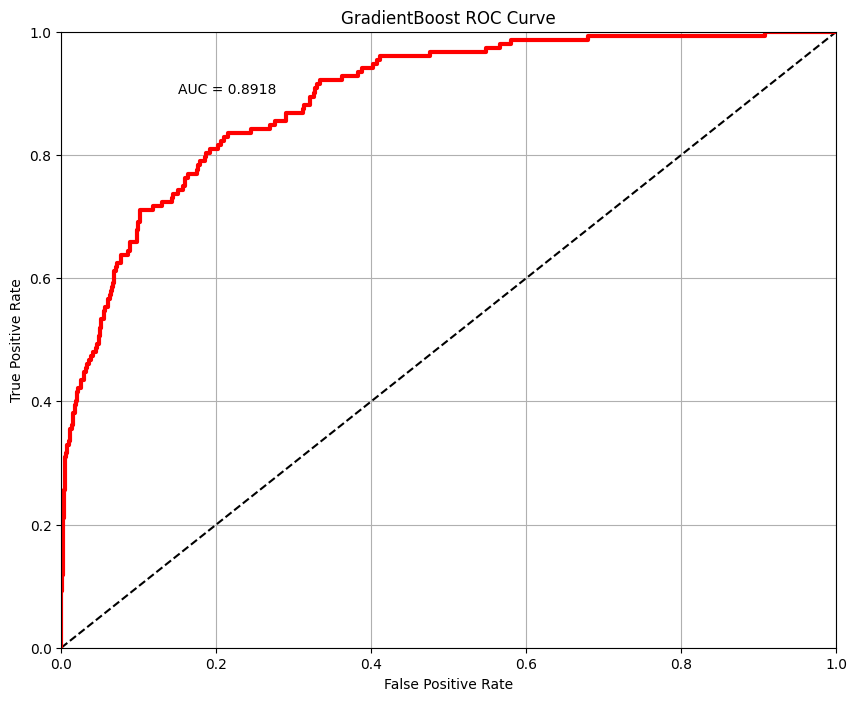

In [3]:
gbc=GradientBoostingClassifier(n_estimators=3000,learning_rate=0.005,min_samples_leaf=70,min_samples_split=1100,max_depth=12,max_features='sqrt',random_state=10)
gbc.fit(X_train, y_train)
y_valid_scores = gbc.predict_proba(X_valid)[:, 1]
fpr, tpr, threshold = roc_curve(y_valid, y_valid_scores)
auc_valid = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, "r", linewidth=3)
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GradientBoost ROC Curve")
plt.xlim(0,1)
plt.ylim(0,1)
plt.text(0.15, 0.9, "AUC = " + str (round (auc_valid, 4)))
plt.show

In [ ]:
X_train = X_train.append(X_valid)
y_train = y_train.append(y_valid)

X_test = pd.read_csv("X_test_new.csv")
X_test = X_test.dropna(axis = 1)

In [ ]:
model.fit(X_train, y_train)
y_pred_test = model.predict_proba(X_test)[:,1]
pd.DataFrame(y_pred_test).to_csv("y_test_classification.csv")